# <center> <font style="color:rgb(100,109,254)"> Blob Detection</font> </center>

## <font style="color:rgb(134,19,348)"> What are Blobs </font>


Blobs are groups of connected pixels having same intensity values, they can be circular or have any shape in general, the process of detecting these blobs and marking them is called blob detection.

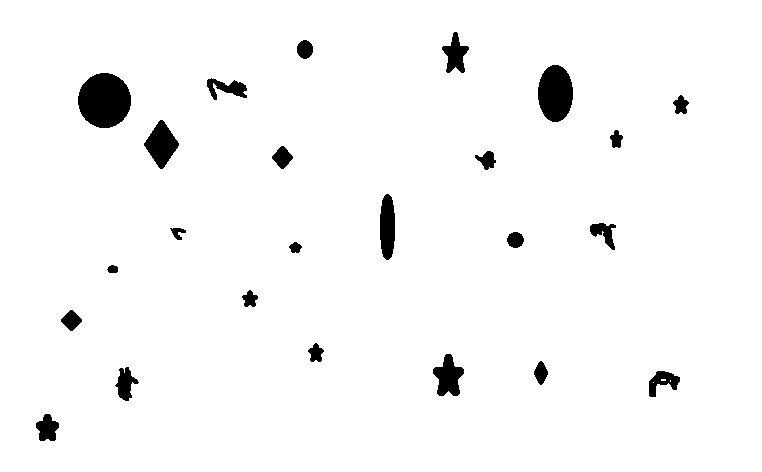


Now remember when we segment out a colored object, we usually get binary black and white mask where the white part corresponds to our foreground (target object). Now the next step is to detect these blobs (get the coordinates of these white objects) and mark them in some way, this can be easily done with blob detection or contour detection (which we will look at later), now this is kind of like haar cascade detection, we do the the detection and then using the coordinates we mark (draw a rectangle on) the faces.

**Note: In blob detection (with default params) the background is white and in contour detection the object to be detected are in White. Internally Blob detection also uses FindContours function.**

### <font style="color:rgb(134,19,348)">Working Of BlobDetector </font>

The blobdetector implements a simple algorithm for extracting blobs from an image:

This can be broken down to 4 following steps.

1. Convert the source image to binary images by applying thresholding with several thresholds from minThreshold (inclusive) to maxThreshold (exclusive) with distance thresholdStep between neighboring thresholds.
2. Extract connected components from every binary image by findContours and calculate their centers.
3. Group centers from several binary images by their coordinates. Close centers form one group that corresponds to one blob, which is controlled by the minDistBetweenBlobs parameter.
4. From the groups, estimate final centers of blobs and their radius and return as locations and sizes of keypoints.

Now for blob detection in opencv you first have to initialize the detector with the following line.

[```detector = cv2.SimpleBlobDetector_create()```](https://docs.opencv.org/4.2.0/d0/d7a/classcv_1_1SimpleBlobDetector.html)

And then you can run the detector on the image with this

> **keypoints = detector.detect(image)**

Finally this gives us the keypoint object which contains the location and other info about the blob, now you can loop over this object and draw points by using `Keypoint.pt` attribute.

**Note: You can get all the attributes of the Keypoint object by doing `dir(keypoint[0])` given atleast one object was detected**


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## <font style="color:rgb(134,19,348)">  Blob Detection in Opencv </font>
Now lets use these blobs in OpenCV

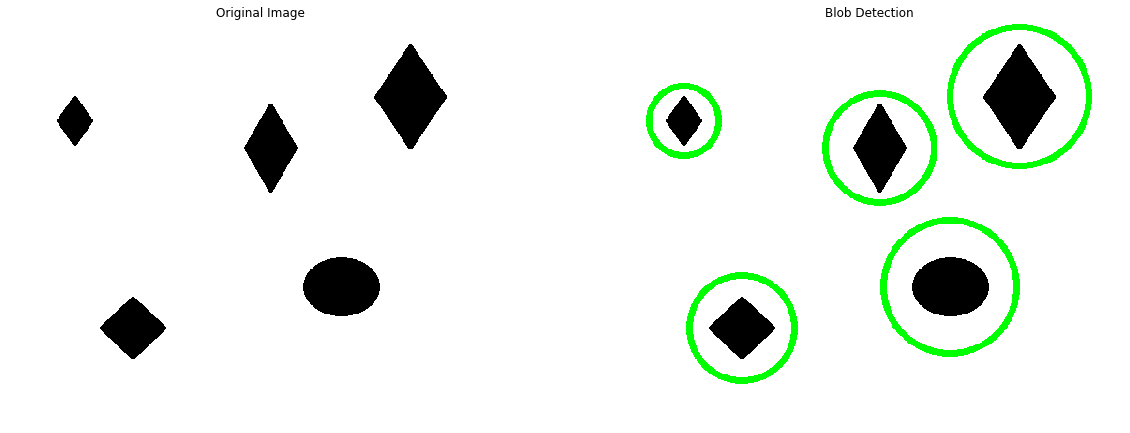

In [13]:
img = cv2.imread('media/M4/blobgeneral.png')

# initilize blob detector
detector = cv2.SimpleBlobDetector_create()

blob_image = img.copy()

# detect the keypoints of the image.
keypoints = detector.detect(img)

# loop over all the keypoints and draw them.
for keypoint in keypoints:
    cv2.circle(blob_image, (int(keypoint.pt[0]) , int(keypoint.pt[1]) ) , int(keypoint.size), (0,255,0), 5)
    
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(122);plt.imshow(blob_image[:,:,::-1]);plt.title("Blob Detection");plt.axis('off');

### <font style="color:rgb(134,19,348)">  DrawKeypoints </font>

Now in Opencv there is a built in method for drawing keypoints called 

[```outImage = cv.drawKeypoints(	image, keypoints, outImage[, color[, flags]])```](https://docs.opencv.org/4.2.0/d4/d5d/group__features2d__draw.html#ga5d2bafe8c1c45289bc3403a40fb88920)


- `image:`	Source image.
- `keypoints:`	Keypoints from the source image.
- `outImage:`	Output image. Its content depends on the flags value defining what is drawn in the output image. See possible flags bit values below.
- `color:`	Color of keypoints.
- `flags:`	Flags setting drawing features. Some possible flags are: `cv2.DRAW_MATCHES_FLAGS_DEFAULT`, `cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS`, `cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG`, `cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS`

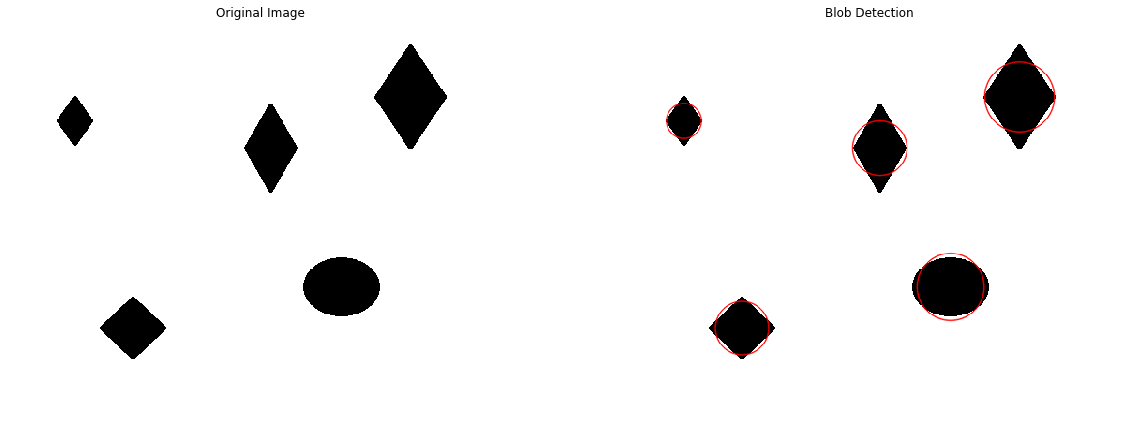

In [14]:
img = cv2.imread('media/M4/blobgeneral.png')

detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(img)

#draw the keypoints on the image
blob_image = cv2.drawKeypoints(img, keypoints, None, (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(122);plt.imshow(blob_image[:,:,::-1]);plt.title("Blob Detection");plt.axis('off');

**Unfortunately the drawKeypoints method does not have any line thickness argument, so you may want to draw the keypoints with cv2.circle or other methods for better visualization purposes and this also how we will be showing the results.**

## <font style="color:rgb(134,19,348)"> Blob detection Parameters </font>

Now you can filter blobs based on certain properties, this helps you to find only the target object among the noise. For e.g if you're trying to find a round ball among other things, then you can tell the blobdetector to only look for round objects.

- `Filter By color/Threshold:` This filter compares the intensity of a binary image at the center of a blob to blobColor. If they differ, the blob is filtered out. Use blobColor = 0 to extract dark blobs and blobColor = 255 to extract light blobs.
- `Filter By area:`. Extracted blobs have an area between minArea (inclusive) and maxArea (exclusive).
- `Filter By circularity:`  Extracted blobs have circularity ( 4∗π∗Area/ (parameter∗parameter ) ) between minCircularity (inclusive) and maxCircularity (exclusive).
- `Filter By ratio of Inertia:` The ratio of the minimum inertia to maximum inertia. Extracted blobs have this ratio between minInertiaRatio (inclusive) and maxInertiaRatio (exclusive).
- `Filter By convexity:` Extracted blobs have convexity (area / area of blob convex hull) between minConvexity (inclusive) and maxConvexity (exclusive).


For setting up these params you have to first initialize the param object like this:

> `params = cv2.SimpleBlobDetector_Params()`

Now you can set the various properties of different parameters

You can check all params [here](https://docs.opencv.org/4.1.0/d8/da7/structcv_1_1SimpleBlobDetector_1_1Params.html)


## <font style="color:rgb(134,19,348)"> Filter By Area: </font>
Let's see how we can filter object with Color/intensity threshold values

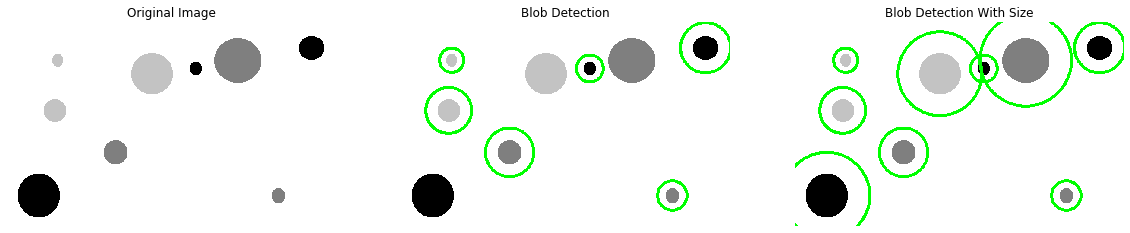

In [15]:
img = cv2.imread('media/M4/blobthreshandarea.png')

params = cv2.SimpleBlobDetector_Params() 

# see how changing the default param of maxArea of 5000 to 10000 gives us the bigger blobs too
params.filterByArea = True
params.maxArea = 10000

# create 2 detectors
detector = cv2.SimpleBlobDetector_create(params)
detector_normal = cv2.SimpleBlobDetector_create()

keypoints = detector.detect(img)
keypoints_normal = detector_normal.detect(img)

blob_normal = img.copy()
for keypoint in keypoints_normal:
    cv2.circle(blob_normal, (int(keypoint.pt[0]) , int(keypoint.pt[1]) ) , int(keypoint.size), (0,255,0), 5)

blob_image = img.copy()
for keypoint in keypoints:
    cv2.circle(blob_image, (int(keypoint.pt[0]) , int(keypoint.pt[1]) ) , int(keypoint.size), (0,255,0), 5)
    
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(img[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(132);plt.imshow(blob_normal[:,:,::-1]);plt.title("Blob Detection");plt.axis('off');
plt.subplot(133);plt.imshow(blob_image[:,:,::-1]);plt.title("Blob Detection With Size");plt.axis('off');

###  <font style="color:rgb(34,169,134)"> Assignment: Target Blobs </font>
Set the min and max area such that you only get the mid sized blobs in the above image

In [ ]:
# ADD CODE HERE



**You can print the values of the default params of and property by just doing `params.propertyname` , exmaple below**

In [ ]:
params.maxArea

## <font style="color:rgb(134,19,348)"> Filter By  Circularity: </font>
Now lets filter an image by how circular the objects are in the image.

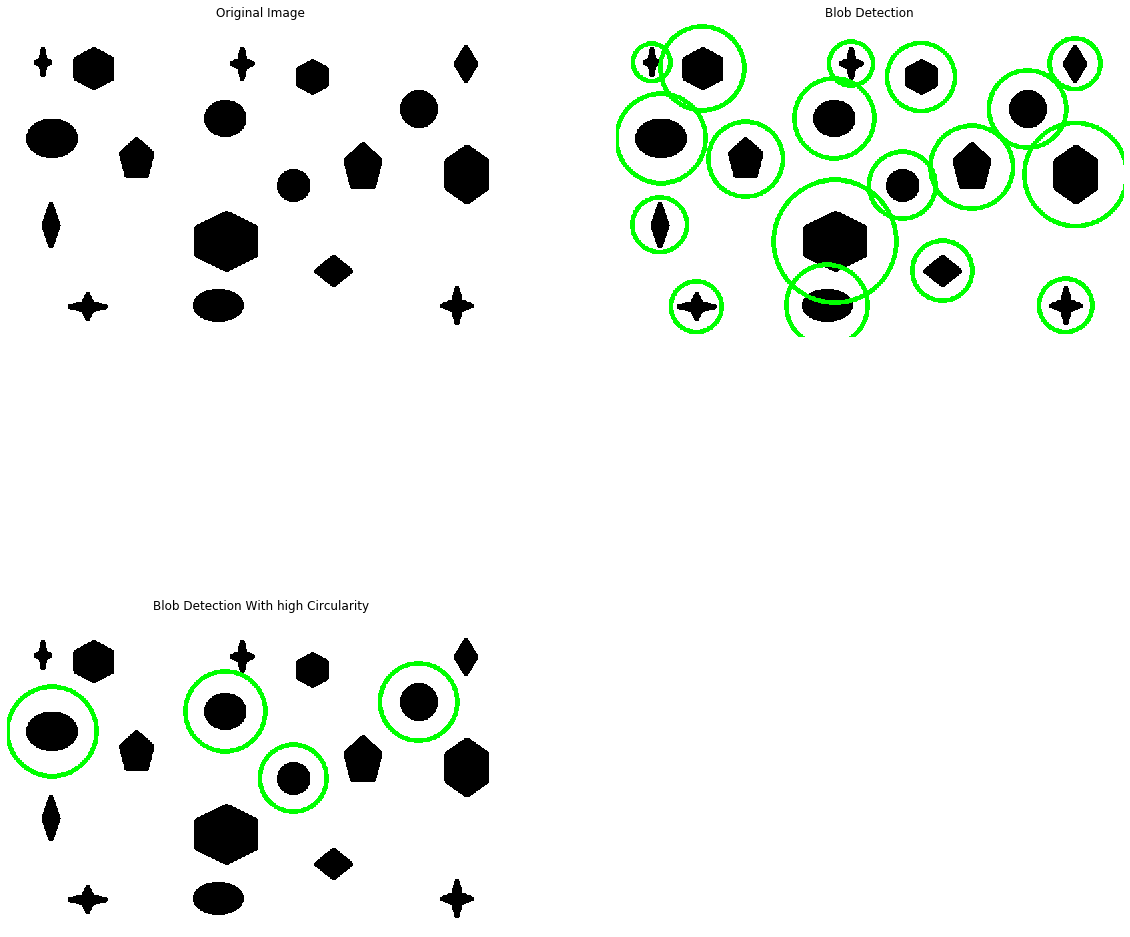

In [17]:
img = cv2.imread('media/M4/blobcircular1.png')

params = cv2.SimpleBlobDetector_Params() 
params_normal = cv2.SimpleBlobDetector_Params() 

# Disabling filter by convexity to also include non convex shapes, and also disable size to include large objects
params_normal.filterByConvexity = False
params_normal.filterByArea = False


# increase the minCircularity to only let circular objects pass
params.filterByCircularity = True
params.minCircularity = 0.87


# create 2 detectors
detector = cv2.SimpleBlobDetector_create(params)
detector_normal = cv2.SimpleBlobDetector_create(params_normal)

keypoints = detector.detect(img)
keypoints_normal = detector_normal.detect(img)


#draw the keypoints on the image
blob_normal = img.copy()
for keypoint in keypoints_normal:
    cv2.circle(blob_normal, (int(keypoint.pt[0]) , int(keypoint.pt[1]) ) , int(keypoint.size), (0,255,0), 5)

blob_image = img.copy()
for keypoint in keypoints:
    cv2.circle(blob_image, (int(keypoint.pt[0]) , int(keypoint.pt[1]) ) , int(keypoint.size), (0,255,0), 5)
    
plt.figure(figsize=[20,20])
plt.subplot(221);plt.imshow(img[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(222);plt.imshow(blob_normal[:,:,::-1]);plt.title("Blob Detection");plt.axis('off');
plt.subplot(223);plt.imshow(blob_image[:,:,::-1]);plt.title("Blob Detection With high Circularity");plt.axis('off');

## <font style="color:rgb(134,19,348)"> Filter By  Inertia ratio: </font>
We can also filter an image by Inertia ratio, now this metric is pretty simple it just measures how a blob is, for e.g for a circle its value will be `1`, for an ellipse this value can be around `0-1` and for a line it will be `0`.

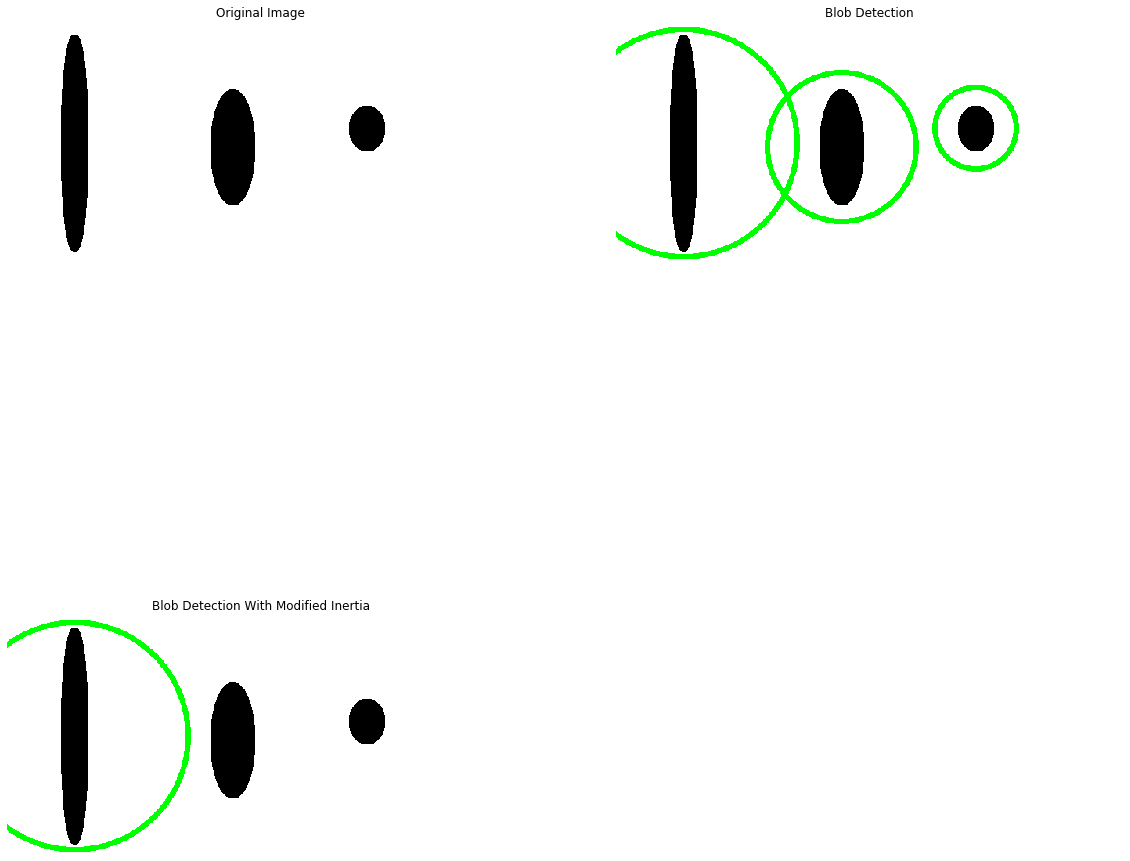

In [20]:
img = cv2.imread('media/M4/blobinertia1.png')

params = cv2.SimpleBlobDetector_Params() 
params_normal = cv2.SimpleBlobDetector_Params() 

# Disabling filter by inertia to also include non convex shapes, and also disable size to include large objects
params_normal.filterByInertia = False
params_normal.filterByArea = False

# Set the minInertia and maxInertia that it extracts only the elongated ellipse on the left
params.filterByArea = False
params.filterByInertia = True
params.minInertiaRatio   =  0.01
params.maxInertiaRatio   =  0.03


# create 2 detectors
detector = cv2.SimpleBlobDetector_create(params)
detector_normal = cv2.SimpleBlobDetector_create(params_normal)

keypoints = detector.detect(img)
keypoints_normal = detector_normal.detect(img)

#draw the keypoints on the image
blob_normal = img.copy()
for keypoint in keypoints_normal:
    cv2.circle(blob_normal, (int(keypoint.pt[0]) , int(keypoint.pt[1]) ) , int(keypoint.size), (0,255,0), 5)

blob_image = img.copy()
for keypoint in keypoints:
    cv2.circle(blob_image, (int(keypoint.pt[0]) , int(keypoint.pt[1]) ) , int(keypoint.size), (0,255,0), 5)
    
plt.figure(figsize=[20,20])
plt.subplot(221);plt.imshow(img[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(222);plt.imshow(blob_normal[:,:,::-1]);plt.title("Blob Detection");plt.axis('off');
plt.subplot(223);plt.imshow(blob_image[:,:,::-1]);plt.title("Blob Detection With Modified Inertia");plt.axis('off');

## <font style="color:rgb(134,19,348)"> Filter By  Convexity:</font>
We can filter a blob by its convexity, now Convexity is defined as the ( Blob Area / Area of Blob's convex hull). Now the convex hull can be defined as a shape that tightly encloses the blob while still being convex.

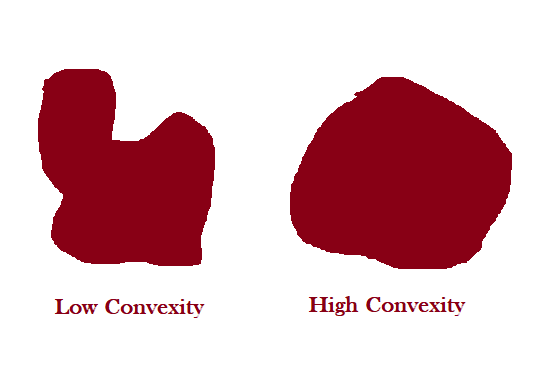

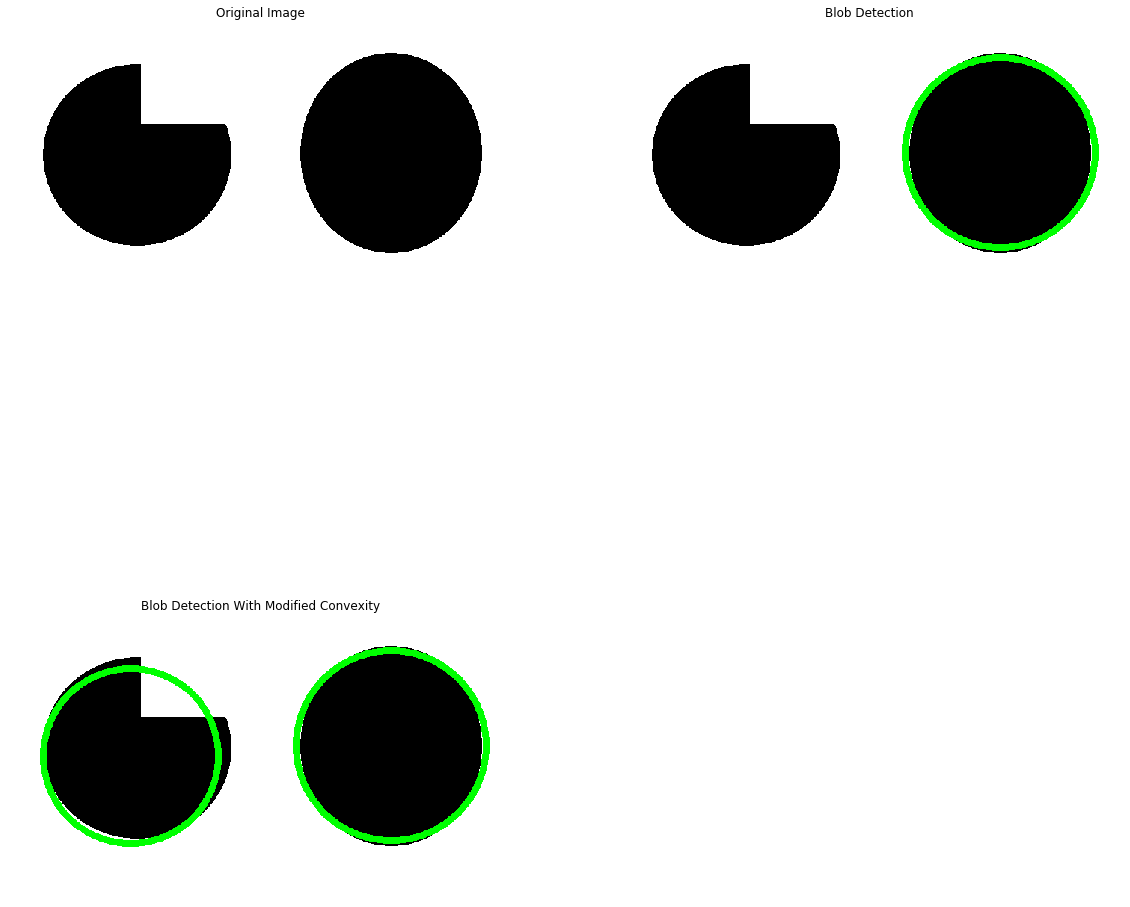

In [21]:
img = cv2.imread('media/M4/blobconvexity1.png')

params = cv2.SimpleBlobDetector_Params() 
params_normal = cv2.SimpleBlobDetector_Params() 

# disable size to include large objects
params_normal.filterByArea = False

# Disable filterByInernia to include low convex shapes
params.filterByArea = False
params.filterByConvexity = False


# create 2 detectors
detector = cv2.SimpleBlobDetector_create(params)
detector_normal = cv2.SimpleBlobDetector_create(params_normal)

keypoints = detector.detect(img)
keypoints_normal = detector_normal.detect(img)

#draw the keypoints on the image
blob_normal = img.copy()
for keypoint in keypoints_normal:
    cv2.circle(blob_normal, (int(keypoint.pt[0]) , int(keypoint.pt[1]) ) , int(keypoint.size//2), (0,255,0), 7)

blob_image = img.copy()
for keypoint in keypoints:
    cv2.circle(blob_image, (int(keypoint.pt[0] ) , int(keypoint.pt[1]) ) , int(keypoint.size//2), (0,255,0), 7)
    
plt.figure(figsize=[20,20])
plt.subplot(221);plt.imshow(img[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(222);plt.imshow(blob_normal[:,:,::-1]);plt.title("Blob Detection");plt.axis('off');
plt.subplot(223);plt.imshow(blob_image[:,:,::-1]);plt.title("Blob Detection With Modified Convexity");plt.axis('off');

**Note: At the moment filterbycolor/intensity contains a bug and does not work property? in OpenCV.**